<a href="https://colab.research.google.com/github/sugarforever/Langchain-Conversational-Chatbot/blob/main/Langchain_Conversational_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
%pip install langchain
%pip install matplotlib

You should consider upgrading via the '/Users/wyang14/.pyenv/versions/3.9.16/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/wyang14/.pyenv/versions/3.9.16/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [63]:
from langchain import OpenAI
from langchain.chains import ConversationChain
from langchain.chains.conversation.memory import ConversationBufferMemory, ConversationSummaryMemory, ConversationBufferWindowMemory, ConversationSummaryBufferMemory
from langchain.callbacks import get_openai_callback
import os

In [64]:
QUERIES = [
    "My interest is to explore the options of scaling Ethereum",
    "Could you please elaborate more on sharding? Try to use at least 1000 words.",
    "What are the cons of sharding?"
    "What should I learn if I decide to work on Ethereum?",
    "What are the most important skills for a blockchain developer?",
    "I have some basic understanding of smart contracts. Other than the basic programming skills, what else should I learn? I know NFT is pretty popular, what should I be capable of doing with NFT?",
    "Opensea is one of the most popular NFT marketplace. What's its architecture? How can I build something similar?",
    "How can I run such a marketplace on Ethereum? What's the cost of running such a marketplace? I would like to know the typical business model of such a marketplace.",
    "In terms of marketing, as more and more NFT collections are published on Opensea, how can my marketplace compete with them? What's the potential opportunity for me to win the battle?",
    "What are the most popular NFT collections on Opensea? What's the typical price of a NFT collection? How can I get a NFT collection on Opensea?"
]

In [65]:
def track_tokens_usage(chain, query, tokens, requests):
    with get_openai_callback() as cb:
        result = chain.run(query)
        print(f'Total tokens: {cb.total_tokens}')
        print(f'Requests: {cb.successful_requests}')
        tokens.append(cb.total_tokens)
        requests.append(cb.successful_requests)

    return result


In [71]:
def start_conversation(llm, queries, memory_type):
    chain = ConversationChain(llm=llm, memory=memory_type)
    tokens = []
    requests = []
    for query in queries:
        print(f'Query: {query}')
        result = track_tokens_usage(chain, query, tokens, requests)
        print(f'Result: {result}')
        print('')

    return tokens, requests

In [72]:
tokens1, requests1 = start_conversation(OpenAI(
    temperature=0,
	openai_api_key=os.environ["OPENAI_API_KEY"],
	model_name="text-davinci-003"
), QUERIES, ConversationBufferMemory())

Query: My interest is to explore the options of scaling Ethereum
Total tokens: 188
Requests: 1
Result:  That's an interesting topic! Ethereum is a decentralized platform that enables developers to create and deploy decentralized applications. It is built on a blockchain technology, which allows for secure and transparent transactions. To scale Ethereum, there are several options available. One option is to increase the block size, which would allow more transactions to be processed in each block. Another option is to use sharding, which would split the blockchain into multiple shards and allow for more transactions to be processed in parallel. Finally, there are also solutions such as Plasma and Raiden Network that are being developed to help scale Ethereum.

Query: Could you please elaborate more on sharding? Try to use at least 1000 words.
Total tokens: 467
Requests: 1
Result:  Sure! Sharding is a scaling solution for Ethereum that involves splitting the blockchain into multiple shar

In [73]:
llm = OpenAI(
    temperature=0,
	openai_api_key=os.environ["OPENAI_API_KEY"],
	model_name="text-davinci-003"
)

(tokens2, requests2) = start_conversation(llm, QUERIES, ConversationSummaryMemory(llm=llm))

Query: My interest is to explore the options of scaling Ethereum
Total tokens: 532
Requests: 2
Result:  That's an interesting topic! Ethereum is a decentralized platform that enables developers to create and deploy decentralized applications. It is built on a blockchain technology, which allows for secure and transparent transactions. To scale Ethereum, there are several options available. One option is to increase the block size, which would allow more transactions to be processed in each block. Another option is to use sharding, which would split the blockchain into multiple shards and allow for more transactions to be processed in parallel. Finally, there are also solutions such as Plasma and Raiden Network that are being developed to help scale Ethereum.

Query: Could you please elaborate more on sharding? Try to use at least 1000 words.
Total tokens: 1014
Requests: 2
Result:  Sure, I'd be happy to explain sharding in more detail. 

Sharding is a scaling solution for Ethereum that 

In [74]:
(tokens3, requests3) = start_conversation(OpenAI(
    temperature=0,
	openai_api_key=os.environ["OPENAI_API_KEY"],
	model_name="text-davinci-003"
), QUERIES, ConversationBufferWindowMemory(k=1))

Query: My interest is to explore the options of scaling Ethereum
Total tokens: 201
Requests: 1
Result:  That's an interesting topic! Ethereum is a decentralized platform that enables developers to create and deploy decentralized applications. It is built on a blockchain technology, which allows for secure and transparent transactions. To scale Ethereum, there are several options available. One option is to increase the block size, which would allow more transactions to be processed in each block. Another option is to use sharding, which would split the blockchain into multiple shards and allow for more transactions to be processed in parallel. Finally, there is the option of using off-chain solutions, such as sidechains or state channels, which would allow for transactions to be processed outside of the main blockchain.

Query: Could you please elaborate more on sharding? Try to use at least 1000 words.
Total tokens: 480
Requests: 1
Result:  Sure! Sharding is a scaling solution for Eth

In [75]:
llm = OpenAI(
    temperature=0,
	openai_api_key=os.environ["OPENAI_API_KEY"],
	model_name="text-davinci-003"
)

(tokens4, requests4) = start_conversation(llm, QUERIES, ConversationSummaryBufferMemory(
        llm=llm,
        max_token_limit=600
))

Query: My interest is to explore the options of scaling Ethereum
Total tokens: 201
Requests: 1
Result:  That's an interesting topic! Ethereum is a decentralized platform that enables developers to create and deploy decentralized applications. It is built on a blockchain technology, which allows for secure and transparent transactions. To scale Ethereum, there are several options available. One option is to increase the block size, which would allow more transactions to be processed in each block. Another option is to use sharding, which would split the blockchain into multiple shards and allow for more transactions to be processed in parallel. Finally, there is the option of using off-chain solutions, such as sidechains or state channels, which would allow for transactions to be processed outside of the main blockchain.

Query: Could you please elaborate more on sharding? Try to use at least 1000 words.
Total tokens: 480
Requests: 1
Result:  Sure! Sharding is a scaling solution for Eth

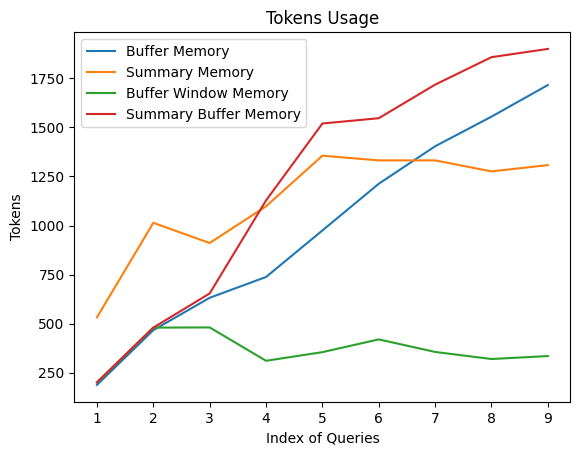

In [76]:
import matplotlib.pyplot as plt

xs = range(1, len(QUERIES) + 1)
plt.plot(xs, tokens1, label='Buffer Memory')
plt.plot(xs, tokens2, label='Summary Memory')
plt.plot(xs, tokens3, label='Buffer Window Memory')
plt.plot(xs, tokens4, label='Summary Buffer Memory')

plt.xlabel('Index of Queries')
plt.ylabel('Tokens')
plt.title('Tokens Usage')
plt.legend()
plt.show()